In [1]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

In [2]:
!pip install -U ultralytics albumentations

from IPython import display
display.clear_output()

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40  Python-3.11.7 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16380MiB)
Setup complete  (16 CPUs, 31.8 GB RAM, 184.6/249.8 GB disk)


In [4]:
import zipfile
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [ ]:
import torch
import torch.nn as nn
print("GPU Available: ", torch.cuda.is_available())
alpha_per_class = {
    0: 0.0782, 2: 0.05789, 4: 0.08765, 5: 0.0916, 6: 0.09428, 7: 0.06942,
    8: 0.08554, 9: 0.09172, 11: 0.09113, 12: 0.08998, 14: 0.05166, 15: 0.06558
}


class FocalLossWithAlpha(nn.Module):
    def __init__(self, alpha_per_class, gamma=2.0):
        super(FocalLossWithAlpha, self).__init__()
        self.alpha_per_class = alpha_per_class  # Dictionary {class_id: alpha}
        self.gamma = gamma

    def forward(self, preds, targets):
        assert preds.dim() == 2
        assert targets.dim() == 1
        assert preds.size(0) == targets.size(0)

        num_classes = preds.size(1)

        alpha_tensor = torch.tensor(
            [self.alpha_per_class.get(c, 1.0) for c in range(num_classes)],
            device=preds.device
        )
        one_hot_targets = torch.zeros_like(preds).scatter(1, targets.unsqueeze(1), 1)
        p_t = preds * one_hot_targets + (1 - preds) * (1 - one_hot_targets)
        alpha_t = alpha_tensor[targets]
        focal_loss = -alpha_t * (1 - p_t) ** self.gamma * torch.log(p_t + 1e-8)
        return focal_loss.mean()

GPU Available:  True


In [5]:
from ultralytics import YOLO
model = YOLO('yolov8m.pt')

for name, param in model.model.named_parameters():
    if "head" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

model.model.loss = FocalLossWithAlpha(alpha_per_class, gamma=2.0)


adam_optimizer_config = {
    'optimizer': 'AdamW',
    'lr0': 0.002,
    'lrf': 0.0002,
    'betas': (0.9, 0.999),
    'eps': 1e-8,
    'weight_decay': 0.001
}


results = model.train(
    data='config.yaml',
    epochs=250,
    imgsz=640,
    batch=32,
    workers=4,
    optimizer=adam_optimizer_config["optimizer"],
    device=0 if torch.cuda.is_available() else 'cpu',
    warmup_epochs=5.0,
    warmup_bias_lr=0.01,
    patience=25,
    box=7.5,
    cls=2.0,
    dfl=1.5,
    augment=True,
    mosaic=1.0,
    mixup=1.0,
    label_smoothing=0.1,
    lr0=adam_optimizer_config['lr0'],
    weight_decay=adam_optimizer_config['weight_decay'],
    lrf=adam_optimizer_config['lrf'],
    project='D:\TLCN_1\YOLOv8_training_medium',
)



100%|██████████| 49.7M/49.7M [00:03<00:00, 13.8MB/s]


WARNING  'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.40  Python-3.11.7 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16380MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=config.yaml, epochs=250, time=None, patience=25, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=D:\TLCN_1\YOLOv8_training_medium, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fa

100%|██████████| 5.35M/5.35M [00:01<00:00, 3.30MB/s]


AMP: checks passed 


train: Scanning D:\TLCN_1\dataset\train\labels.cache... 10014 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10014/10014 [00:00<?, ?it/s]

train: WARNING  D:\TLCN_1\dataset\train\images\6438.jpg: corrupt JPEG restored and saved
train: WARNING  D:\TLCN_1\dataset\train\images\6439.jpg: corrupt JPEG restored and saved
train: WARNING  D:\TLCN_1\dataset\train\images\6441.jpg: corrupt JPEG restored and saved
train: WARNING  D:\TLCN_1\dataset\train\images\6463.jpg: corrupt JPEG restored and saved
train: WARNING  D:\TLCN_1\dataset\train\images\6477.jpg: corrupt JPEG restored and saved
train: WARNING  D:\TLCN_1\dataset\train\images\6492.jpg: corrupt JPEG restored and saved
train: WARNING  D:\TLCN_1\dataset\train\images\6493.jpg: corrupt JPEG restored and saved
train: WARNING  D:\TLCN_1\dataset\train\images\6494.jpg: corrupt JPEG restored and saved
train: WARNING  D:\TLCN_1\dataset\train\images\6495.jpg: corrupt JPEG restored and saved
train: WARNING  D:\TLCN_1\dataset\train\images\6496.jpg: corrupt JPEG restored and saved
train: WARNING  D:\TLCN_1\dataset\train\images\6498.jpg: corrupt JPEG restored and saved
train: WARNING  D:\TL


c:\Users\AndyAnh\anaconda3\envs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning D:\TLCN_1\dataset\val\labels.cache... 325 images, 0 backgrounds, 0 corrupt: 100%|██████████| 325/325 [00:00<?, ?it/s]

val: WARNING  D:\TLCN_1\dataset\val\images\6440.jpg: corrupt JPEG restored and saved


Plotting labels to D:\TLCN_1\YOLOv8_training_medium\train\labels.jpg... 
optimizer: AdamW(lr=0.002, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.001), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to D:\TLCN_1\YOLOv8_training_medium\train
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      13.2G      1.076      6.457      1.229        128        640: 100%|██████████| 313/313 [03:31<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        325        413      0.771       0.65      0.674      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      13.4G      1.063      4.894      1.216        132        640: 100%|██████████| 313/313 [03:31<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        325        413      0.739      0.635      0.617      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      13.4G      1.019      4.502       1.21        131        640: 100%|██████████| 313/313 [03:30<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        325        413      0.827      0.712      0.703      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      13.4G     0.9745      4.084      1.185        133        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        325        413      0.846      0.668      0.681      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      13.5G     0.9655       4.05       1.18        138        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all        325        413      0.857       0.71      0.707      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      13.4G     0.9484      3.937      1.171        131        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        325        413      0.881      0.717      0.715      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      13.5G     0.9225      3.798      1.152        129        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        325        413      0.857      0.717      0.728       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      13.4G     0.9106      3.679      1.144        142        640: 100%|██████████| 313/313 [03:28<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        325        413      0.885      0.731      0.731      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      13.5G      0.894      3.533      1.133        160        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]

                   all        325        413      0.876      0.721      0.717      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      13.4G     0.8848      3.492      1.133        135        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        325        413      0.869      0.732      0.733       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      13.5G     0.8671      3.409       1.12        124        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]

                   all        325        413      0.879      0.729      0.743      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      13.5G     0.8581      3.352      1.111        109        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        325        413      0.872      0.728      0.736      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      13.5G     0.8542      3.341      1.113        126        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]

                   all        325        413      0.871      0.737      0.737      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      13.4G     0.8444      3.286       1.11        133        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        325        413      0.887      0.727      0.752      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      13.5G     0.8398      3.256      1.107        143        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        325        413      0.879      0.732      0.755      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      13.4G     0.8383      3.262      1.104        125        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        325        413      0.881      0.729      0.747      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      13.5G     0.8238      3.133      1.093        138        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]

                   all        325        413      0.895      0.737      0.752      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      13.4G     0.8223      3.138      1.096        145        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        325        413      0.904      0.731      0.754      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      13.5G     0.8166       3.12       1.09        101        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.70it/s]

                   all        325        413      0.901      0.728      0.755      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      13.4G     0.8133      3.121       1.09        141        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        325        413      0.901      0.737      0.759      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      13.5G     0.8091      3.066      1.088        111        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        325        413      0.907      0.728      0.763      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      13.4G      0.802      3.035      1.078        123        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        325        413      0.902      0.734      0.765      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      13.5G     0.8082      3.053      1.083        111        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.70it/s]

                   all        325        413      0.903      0.735      0.764      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      13.4G     0.7992      3.014      1.076        117        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        325        413      0.897      0.735      0.767      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      13.6G      0.792       3.01       1.08        141        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]

                   all        325        413      0.904      0.737      0.776      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      13.4G     0.7894      2.947      1.072        133        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        325        413      0.902      0.737      0.775      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      13.5G      0.789      2.943      1.072        118        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        325        413      0.907      0.732      0.766      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      13.4G     0.7737      2.865      1.057        130        640: 100%|██████████| 313/313 [03:29<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.00it/s]

                   all        325        413      0.898      0.739      0.768      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      13.5G      0.779       2.91      1.061        127        640: 100%|██████████| 313/313 [03:28<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]

                   all        325        413      0.874      0.761      0.782      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      13.5G     0.7859      2.911      1.072        101        640: 100%|██████████| 313/313 [03:28<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        325        413      0.874      0.757      0.781       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      13.5G     0.7776      2.873      1.064        149        640: 100%|██████████| 313/313 [03:28<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        325        413      0.891      0.739      0.781      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      13.4G     0.7705      2.848      1.059        115        640: 100%|██████████| 313/313 [03:28<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        325        413      0.902      0.744      0.784       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      13.5G     0.7681       2.82       1.06        116        640: 100%|██████████| 313/313 [03:28<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.00it/s]

                   all        325        413       0.89      0.755      0.791      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      13.4G     0.7674      2.806      1.062        130        640: 100%|██████████| 313/313 [03:29<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        325        413      0.889      0.756      0.801      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      13.5G     0.7622      2.795      1.063        122        640: 100%|██████████| 313/313 [03:28<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        325        413      0.889      0.752      0.788      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      13.4G     0.7548      2.735      1.053        141        640: 100%|██████████| 313/313 [03:28<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        325        413      0.864      0.767      0.792       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      13.5G     0.7544      2.754      1.053        123        640: 100%|██████████| 313/313 [03:28<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        325        413       0.88      0.758        0.8      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      13.4G     0.7597      2.792      1.058        120        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all        325        413      0.891      0.745       0.79      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      13.5G     0.7508      2.733      1.049        131        640: 100%|██████████| 313/313 [03:28<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]

                   all        325        413      0.889      0.758      0.787      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      13.4G     0.7509      2.741      1.049        127        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]

                   all        325        413      0.898      0.759      0.791      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      13.5G     0.7529      2.728      1.047        122        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        325        413      0.888      0.752      0.789      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      13.4G     0.7531       2.72      1.052        131        640: 100%|██████████| 313/313 [03:28<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        325        413      0.893       0.76      0.796      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      13.5G     0.7549      2.729      1.055        143        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        325        413      0.895      0.758      0.794      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      13.4G     0.7442      2.685      1.049        113        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all        325        413      0.869      0.765      0.795      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      13.6G     0.7423      2.662      1.043        138        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]

                   all        325        413      0.892      0.764        0.8      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      13.5G     0.7457      2.677      1.048        165        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        325        413      0.886      0.764      0.797      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      13.5G     0.7364      2.615      1.038        127        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        325        413      0.889      0.771      0.804      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      13.4G     0.7411      2.647      1.045        140        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        325        413      0.886       0.78       0.81      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      13.6G     0.7402       2.64      1.047        151        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        325        413      0.876      0.776      0.814      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      13.4G     0.7322      2.616      1.043        118        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        325        413      0.873      0.776      0.811      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      13.5G     0.7267      2.581      1.036        137        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]

                   all        325        413      0.876      0.776      0.808      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      13.4G      0.732      2.606      1.043        134        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        325        413      0.861      0.789      0.809      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      13.5G     0.7278      2.611      1.042        128        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        325        413      0.892      0.769      0.807       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      13.5G      0.727      2.568      1.037        131        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        325        413      0.867      0.785      0.811      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      13.5G     0.7319      2.589      1.036        132        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        325        413      0.872      0.785      0.817      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      13.4G      0.731      2.611       1.04        125        640: 100%|██████████| 313/313 [03:28<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        325        413      0.897       0.77      0.814      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      13.5G     0.7253      2.556      1.037        133        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        325        413      0.874      0.793      0.817      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      13.4G      0.717      2.528      1.029        153        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  2.00it/s]

                   all        325        413      0.866      0.795      0.811      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      13.5G      0.719      2.522      1.033        131        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        325        413      0.889      0.778       0.82      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      13.4G     0.7094      2.495      1.025        137        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        325        413      0.901      0.775      0.823      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      13.5G      0.716      2.512      1.029        134        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        325        413      0.887      0.786      0.825      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      13.4G     0.7128      2.521      1.026        126        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        325        413       0.88      0.792      0.821      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      13.5G     0.7091      2.457      1.028        160        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        325        413      0.907      0.767      0.816      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      13.4G     0.7047      2.474      1.023        139        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        325        413      0.895      0.772      0.819      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      13.5G     0.7092      2.476      1.028        115        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        325        413      0.875      0.794      0.815      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      13.4G     0.7181      2.528      1.038        135        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        325        413      0.891      0.779      0.815      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      13.5G     0.7111      2.461      1.029        129        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.69it/s]

                   all        325        413      0.883       0.79       0.82      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      13.5G     0.7078      2.475      1.028        121        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        325        413       0.88      0.779      0.822      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      13.5G     0.7066      2.445      1.028        119        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.70it/s]

                   all        325        413      0.897      0.774      0.824      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      13.4G     0.7055      2.453      1.024        138        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        325        413      0.889      0.778      0.821      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      13.5G        0.7      2.425      1.019        148        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.79it/s]

                   all        325        413      0.888      0.775      0.822      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      13.4G     0.7056      2.465      1.023        141        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        325        413      0.886      0.783      0.822      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      13.6G     0.6923      2.377      1.015        122        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        325        413      0.887      0.782      0.822      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      13.4G      0.698      2.412      1.022        134        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        325        413      0.896      0.775      0.824      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      13.5G     0.6975      2.412      1.019        142        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.79it/s]

                   all        325        413      0.857       0.81      0.821      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      13.4G     0.6917      2.388      1.015        125        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        325        413      0.865      0.802      0.822      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      13.5G     0.6951       2.42      1.017        132        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        325        413      0.884      0.795      0.823      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      13.4G     0.6925      2.397       1.02        141        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        325        413      0.872      0.789      0.821      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      13.5G     0.6954      2.391      1.023        141        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

                   all        325        413      0.895      0.778      0.823      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      13.4G     0.6884      2.346      1.014        122        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        325        413      0.868      0.803      0.825       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      13.5G     0.6993      2.387      1.022        134        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        325        413      0.858      0.801      0.823      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      13.4G     0.6992      2.398      1.021        131        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        325        413      0.855      0.812      0.827      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      13.5G     0.6931      2.382      1.017        126        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]

                   all        325        413       0.84      0.826      0.829      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      13.4G     0.6851      2.351      1.016        139        640: 100%|██████████| 313/313 [03:28<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]

                   all        325        413      0.842      0.827      0.829      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      13.5G     0.6819      2.324      1.011        131        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        325        413      0.839      0.823      0.827      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      13.4G     0.6907      2.374       1.02        125        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        325        413      0.836      0.822      0.826      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      13.5G     0.6814      2.309      1.012        139        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        325        413      0.908      0.765      0.823      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      13.4G     0.6855      2.336      1.016        130        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        325        413      0.899      0.774      0.826      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      13.5G     0.6851      2.323      1.016        129        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]

                   all        325        413      0.897      0.774      0.827      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      13.4G     0.6781      2.303      1.006        113        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        325        413      0.901      0.774      0.827      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      13.5G     0.6805      2.324      1.015        113        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]

                   all        325        413       0.87       0.79      0.827      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      13.4G     0.6799      2.296      1.008        130        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        325        413      0.875      0.789      0.826      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      13.5G     0.6766        2.3       1.01        138        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        325        413      0.871      0.791      0.826      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      13.4G     0.6782       2.31      1.009        128        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        325        413      0.872      0.794      0.826      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      13.5G     0.6747      2.289      1.005        117        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]

                   all        325        413       0.87      0.796      0.827      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      13.4G      0.676      2.289      1.008        136        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        325        413      0.862      0.804      0.827      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      13.5G     0.6759      2.273      1.011        131        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.57it/s]

                   all        325        413      0.862      0.808      0.827      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      13.4G     0.6714       2.27      1.007        116        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all        325        413      0.857       0.81      0.827      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      13.5G     0.6708      2.248      1.004        132        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]

                   all        325        413      0.855      0.812      0.828      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      13.4G     0.6698      2.266      1.004        134        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        325        413      0.855      0.812      0.827      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      13.5G     0.6672      2.229      1.004        118        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

                   all        325        413      0.856      0.813      0.828      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      13.4G     0.6728       2.25      1.003        117        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        325        413      0.855      0.813      0.827      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      13.5G     0.6609      2.229     0.9973        122        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.77it/s]

                   all        325        413      0.852      0.813      0.827      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      13.5G     0.6744      2.273      1.006        158        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        325        413      0.852      0.814      0.827      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      13.5G     0.6738      2.278      1.005        115        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all        325        413       0.85      0.814      0.828      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      13.4G     0.6652      2.207     0.9968        133        640: 100%|██████████| 313/313 [03:28<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        325        413       0.85      0.816      0.828      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      13.5G     0.6679      2.266     0.9976        132        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        325        413      0.854      0.814      0.828      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      13.4G     0.6647      2.236     0.9975        114        640: 100%|██████████| 313/313 [03:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all        325        413      0.853      0.816      0.828      0.718
EarlyStopping: Training stopped early as no improvement observed in last 25 epochs. Best results observed at epoch 83, best model saved as best.pt.
To update EarlyStopping(patience=25) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



108 epochs completed in 6.359 hours.
Optimizer stripped from D:\TLCN_1\YOLOv8_training_medium\train\weights\last.pt, 52.0MB
Optimizer stripped from D:\TLCN_1\YOLOv8_training_medium\train\weights\best.pt, 52.0MB

Validating D:\TLCN_1\YOLOv8_training_medium\train\weights\best.pt...
Ultralytics 8.3.40  Python-3.11.7 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16380MiB)
Model summary (fused): 218 layers, 25,849,024 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]


                   all        325        413      0.898      0.775       0.83      0.709
              no entry         30         30      0.834      0.667      0.638      0.483
    no stop or parking         41         41      0.918      0.878      0.883      0.704
            no parking         54         54      0.865      0.711       0.84      0.699
           no vehicles         25         25      0.985          1      0.995      0.985
 vehicle no turn right         25         25      0.986          1      0.995      0.956
  vehicle no turn left         25         25      0.805       0.64      0.817      0.704
           pedestrians         32         32      0.884      0.714      0.696      0.553
            keep right         26         26      0.707      0.538      0.597      0.518
             keep left         25         25          1      0.708      0.866      0.654
          no turn left         25         25      0.986          1      0.995      0.956
         no turn righ

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


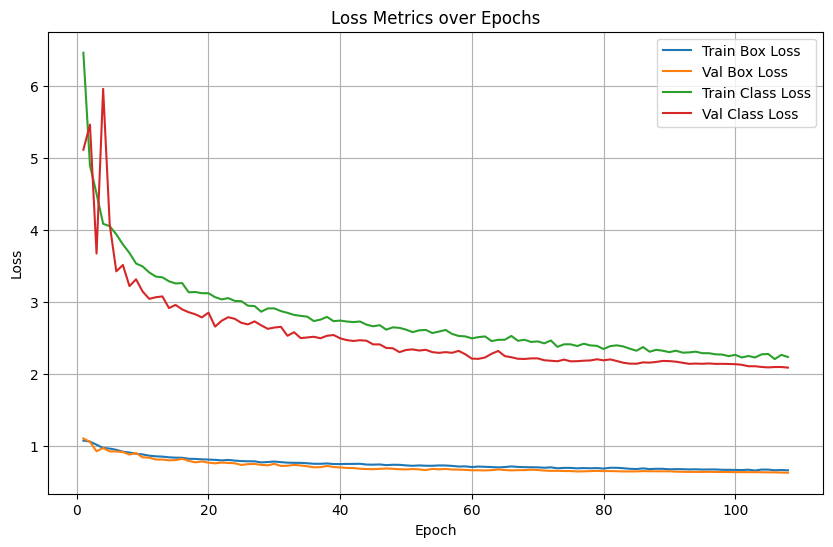

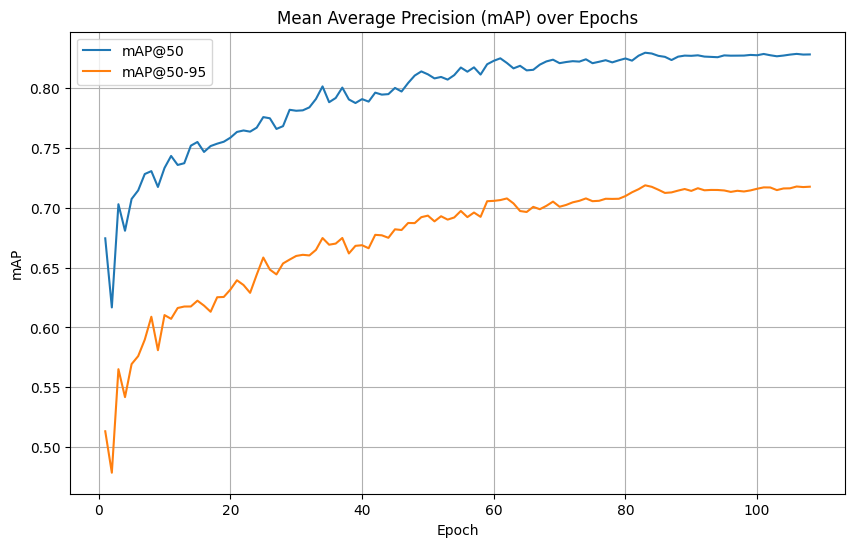

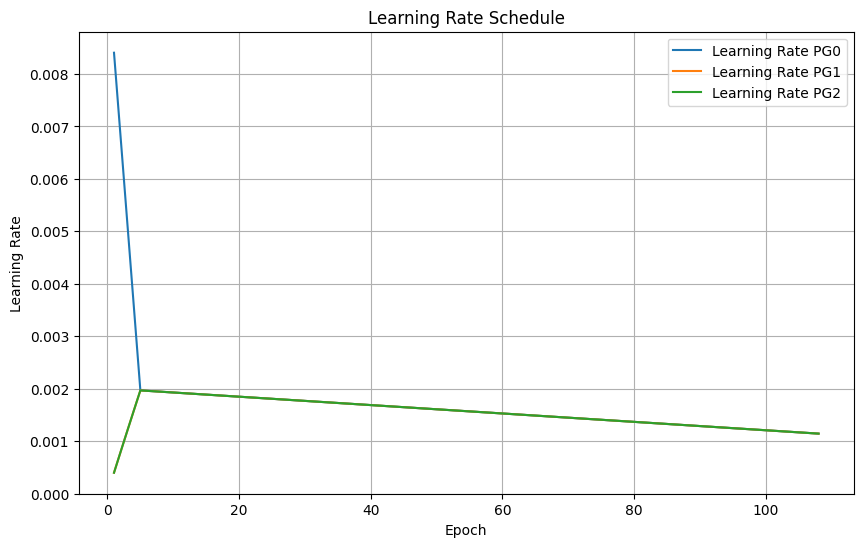

In [ ]:
 

# Đường dẫn tới file kết quả của YOLO
results_csv_path = 'YOLOv8_training_medium/train/results.csv'

# Đọc dữ liệu từ file CSV
df = pd.read_csv(results_csv_path)

# Kiểm tra các cột có trong file
print(df.columns)

# Vẽ biểu đồ Training Loss và Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Class Loss')
plt.title('Loss Metrics over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ Mean Average Precision (mAP)
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@50-95')
plt.title('Mean Average Precision (mAP) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ Learning Rate Schedule
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['lr/pg0'], label='Learning Rate PG0')
plt.plot(df['epoch'], df['lr/pg1'], label='Learning Rate PG1')
plt.plot(df['epoch'], df['lr/pg2'], label='Learning Rate PG2')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO

model_path = "/YOLOv8_training_medium/train/weights/best.pt"

model = YOLO(model_path)

image_path = "/content/dataset/test/images/11828.jpg"

results = model.predict(source=image_path, save=True, conf=0.5)

img = cv2.imread(image_path)

for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        conf = box.conf[0]
        class_id = box.cls[0]

        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)
        cv2.putText(img, f"{model.names[int(class_id)]} {conf:.2f}",
                    (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

output_path = "output_image.jpg"
cv2.imwrite(output_path, img)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()